## **Mapas do Espírito Santo**

### **Carregando o Mapa Base**

#### **Carregando Bibliotecas**

In [ ]:
# Instalando as bibliotecas necessárias para o projeto
%pip install pandas --quiet
%pip install geopandas --quiet
%pip install matplotlib --quiet
%pip install shapely --quiet
%pip install folium --quiet

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import MultiPolygon
import matplotlib.pyplot as plt
import folium
from folium import GeoJson
from folium import GeoJsonTooltip
from folium.plugins import LocateControl
from branca.colormap import linear
from branca.element import Element

#### **Carregando o Shapefile**

In [2]:
# Carregando o shape do estado do Espírito Santo
gdf_ES = gpd.read_file('Shapes/ES_Municipios_2024.shp', encoding='cp1252')

In [3]:
# Atribuir o Coordinate Reference System - CRS (em geral, o IBGE usa o padrão SIRGAS 2000, cujo CRS é EPSG:4674)
gdf_ES = gdf_ES.set_crs("EPSG:4674")

In [4]:
# Exibindo os primeiros valores do dataframe
gdf_ES.head()

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
0,3200409,Anchieta,320001,Vitória,3201,Vitória,32,Espírito Santo,ES,3,Sudeste,SE,None,None,409.691,"MULTIPOLYGON (((-40.68438 -20.82728, -40.68428..."
1,3203502,Montanha,320003,São Mateus,3202,São Mateus,32,Espírito Santo,ES,3,Sudeste,SE,None,None,1099.060,"POLYGON ((-40.34393 -18.28299, -40.34397 -18.2..."
2,3202207,Fundão,320001,Vitória,3201,Vitória,32,Espírito Santo,ES,3,Sudeste,SE,3205309,Vitória/ES,286.854,"POLYGON ((-40.19506 -20.03569, -40.19545 -20.0..."
3,3202256,Governador Lindenberg,320005,Colatina,3203,Colatina,32,Espírito Santo,ES,3,Sudeste,SE,None,None,360.016,"POLYGON ((-40.49596 -19.11354, -40.49529 -19.1..."
4,3204807,São José do Calçado,320008,Alegre,3204,Cachoeiro do Itapemirim,32,Espírito Santo,ES,3,Sudeste,SE,None,None,273.489,"POLYGON ((-41.62823 -20.86183, -41.62814 -20.8..."


In [5]:
# Checando os tipos de dados
gdf_ES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    78 non-null     object  
 1   NM_MUN    78 non-null     object  
 2   CD_RGI    78 non-null     object  
 3   NM_RGI    78 non-null     object  
 4   CD_RGINT  78 non-null     object  
 5   NM_RGINT  78 non-null     object  
 6   CD_UF     78 non-null     object  
 7   NM_UF     78 non-null     object  
 8   SIGLA_UF  78 non-null     object  
 9   CD_REGIA  78 non-null     object  
 10  NM_REGIA  78 non-null     object  
 11  SIGLA_RG  78 non-null     object  
 12  CD_CONCU  11 non-null     object  
 13  NM_CONCU  11 non-null     object  
 14  AREA_KM2  78 non-null     float64 
 15  geometry  78 non-null     geometry
dtypes: float64(1), geometry(1), object(14)
memory usage: 9.9+ KB


In [6]:
# Alterando o tipo de dados de CD_MUN para int64
gdf_ES['CD_MUN'] = gdf_ES['CD_MUN'].astype(int)

# Checando a alteração de tipo
gdf_ES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    78 non-null     int32   
 1   NM_MUN    78 non-null     object  
 2   CD_RGI    78 non-null     object  
 3   NM_RGI    78 non-null     object  
 4   CD_RGINT  78 non-null     object  
 5   NM_RGINT  78 non-null     object  
 6   CD_UF     78 non-null     object  
 7   NM_UF     78 non-null     object  
 8   SIGLA_UF  78 non-null     object  
 9   CD_REGIA  78 non-null     object  
 10  NM_REGIA  78 non-null     object  
 11  SIGLA_RG  78 non-null     object  
 12  CD_CONCU  11 non-null     object  
 13  NM_CONCU  11 non-null     object  
 14  AREA_KM2  78 non-null     float64 
 15  geometry  78 non-null     geometry
dtypes: float64(1), geometry(1), int32(1), object(13)
memory usage: 9.6+ KB


<Axes: >

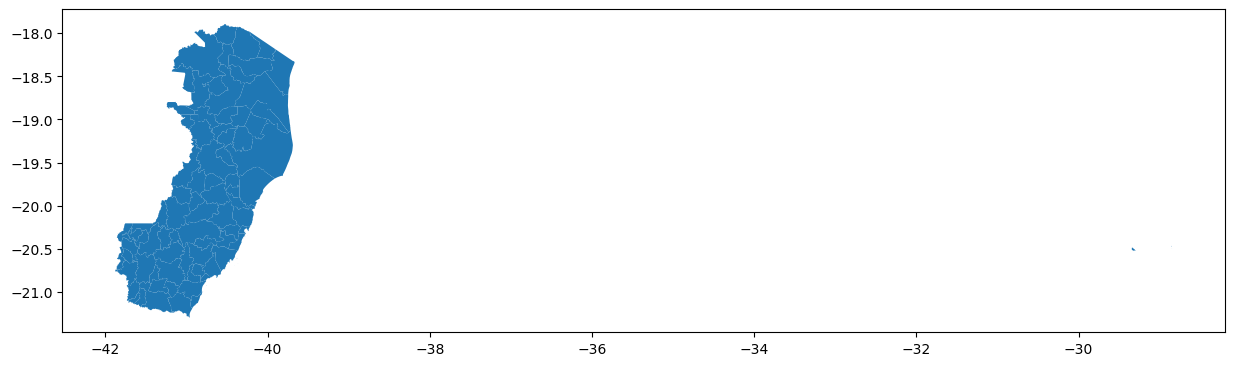

In [7]:
# Exibir o mapa para checar se está correto
gdf_ES.plot(figsize=(15, 15))

##### **Removendo o polígono da Ilha de Trindade**

In [8]:
# Isolar o multipolígono do município de Vitória com a Ilha de Trindade
vitoria_completo = gdf_ES[gdf_ES['NM_MUN'] == 'Vitória'].copy()

# Verificar o tipo e número de polígonos
geom = vitoria_completo.iloc[0].geometry

print("Tipo de geometria:", type(geom))
if isinstance(geom, MultiPolygon):
    print(f"Número de polígonos em Vitória: {len(geom.geoms)}")
    for i, poly in enumerate(geom.geoms):
        bounds = poly.bounds
        print(f"Polígono {i+1} - Bounds: {bounds}")

Tipo de geometria: <class 'shapely.geometry.multipolygon.MultiPolygon'>
Número de polígonos em Vitória: 13
Polígono 1 - Bounds: (-40.277155, -20.309472, -40.2753124, -20.3069311)
Polígono 2 - Bounds: (-40.2872739, -20.305246, -40.2870142, -20.3046598)
Polígono 3 - Bounds: (-40.2760905, -20.2986707, -40.275269, -20.2975307)
Polígono 4 - Bounds: (-40.2840531, -20.2935586, -40.2828619, -20.2919891)
Polígono 5 - Bounds: (-40.2820434, -20.2926727, -40.2816315, -20.2919756)
Polígono 6 - Bounds: (-40.2858766, -20.2847606, -40.2849759, -20.2839423)
Polígono 7 - Bounds: (-40.3623322, -20.3301596, -40.2149426, -20.2292009)
Polígono 8 - Bounds: (-29.3448706, -20.5282613, -29.2987839, -20.4867744)
Polígono 9 - Bounds: (-28.8505887, -20.4978936, -28.8476399, -20.4957887)
Polígono 10 - Bounds: (-28.8544053, -20.4794856, -28.8477591, -20.4718302)
Polígono 11 - Bounds: (-28.8558124, -20.4726365, -28.8551148, -20.4720147)
Polígono 12 - Bounds: (-28.8565385, -20.4706083, -28.8541915, -20.4679907)
Polígo

In [9]:
# Filtrar o GeoDataFrame para obter apenas a linha de Vitória
vitoria_completo_gdf = gdf_ES[gdf_ES['NM_MUN'] == 'Vitória'].copy()

# Acessar a geometria de Vitória com a Ilha de Trindade (MultiPolygon)
geometria_vitoria_completo = vitoria_completo_gdf.geometry.iloc[0]

# Verificar se é um MultiPolygon e acessar seus polígonos
if hasattr(geometria_vitoria_completo, 'geoms'):
    poligonos_vitoria_completo = list(geometria_vitoria_completo.geoms)
else:
    print("A geometria de Vitória não é um MultiPolygon!")
    poligonos_filtrados = [geometria_vitoria_completo] # Trata como uma lista de um único polígono

In [10]:
# Identificar e remover o Polígono 13 (índice 12)
poligono_vitoria_extra = poligonos_vitoria_completo.pop(12)

# Inserir o Polígono 13 na oitava posição (índice 7)
poligonos_vitoria_completo.insert(7, poligono_vitoria_extra)

# Criar uma nova lista contendo apenas os polígonos de Vitória (os primeiros 8)
poligonos_vitoria_continental = poligonos_vitoria_completo[:8]

# Criar um novo MultiPolygon com os polígonos de Vitória continental
vitoria_geo_real = MultiPolygon(poligonos_vitoria_continental)

# Atualizar a geometria no gdf_ES
gdf_ES.loc[gdf_ES['NM_MUN'] == 'Vitória', 'geometry'] = vitoria_geo_real

# Checando atualização dos polígonos de Vitória
vitoria = gdf_ES[gdf_ES['NM_MUN'] == 'Vitória']
geom = vitoria.iloc[0].geometry
print("Tipo de geometria:", type(geom))
if isinstance(geom, MultiPolygon):
    print(f"Número de polígonos em Vitória: {len(geom.geoms)}")
    for i, poly in enumerate(geom.geoms):
        bounds = poly.bounds
        print(f"Polígono {i+1} - Bounds: {bounds}")

Tipo de geometria: <class 'shapely.geometry.multipolygon.MultiPolygon'>
Número de polígonos em Vitória: 8
Polígono 1 - Bounds: (-40.277155, -20.309472, -40.2753124, -20.3069311)
Polígono 2 - Bounds: (-40.2872739, -20.305246, -40.2870142, -20.3046598)
Polígono 3 - Bounds: (-40.2760905, -20.2986707, -40.275269, -20.2975307)
Polígono 4 - Bounds: (-40.2840531, -20.2935586, -40.2828619, -20.2919891)
Polígono 5 - Bounds: (-40.2820434, -20.2926727, -40.2816315, -20.2919756)
Polígono 6 - Bounds: (-40.2858766, -20.2847606, -40.2849759, -20.2839423)
Polígono 7 - Bounds: (-40.3623322, -20.3301596, -40.2149426, -20.2292009)
Polígono 8 - Bounds: (-40.2751237, -20.3086915, -40.2736245, -20.3068429)


<Axes: >

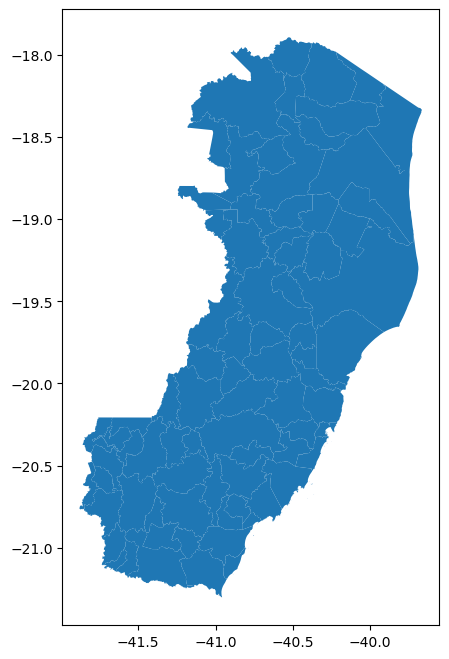

In [11]:
# Plotar novamente o mapa do ES para verificar o resultado
gdf_ES.plot(figsize=(8, 8))

##### **Simplificação da geometria e criação do arquivo GeoJSON**

In [12]:
# Simplificar a geometria para deixar o GeoJSON mais leve
gdf_ES.loc[:, 'geometry'] = gdf_ES['geometry'].simplify(tolerance=0.001, preserve_topology=True)

In [13]:
# Salvar como GeoJSON
gdf_ES.to_file('ES_Municipios_2024.geojson', driver='GeoJSON')

print("Conversão feita! GeoJSON salvo como 'ES_Municipios_2024.geojson'")

Conversão feita! GeoJSON salvo como 'ES_Municipios_2024.geojson'


#### **Divisões administrativas do ES**

In [15]:
# Carregando o arquivo XLSX com divisões administrativas do ES
df_divisoes_ES = pd.read_csv('Dados/divisoes_administrativas_ES.csv', sep=';', encoding='utf-8')

In [16]:
# Exibindo as primeiras linhas do DataFrame
df_divisoes_ES.head()

,CD_MUN,NM_MUN,NM_MUN_PAD,LATITUDE_MUN,LONGITUDE_MUN,CD_MICRORREGIAO,NM_MICRORREGIAO,CD_MACRORREGIAO,NM_MACRORREGIAO,CD_SRE,NM_SRE
0,3200102,Afonso Cláudio,AFONSO CLAUDIO,"-20,0778","-41,1249",3,Sudoeste Serrana,1,Metropolitana,1,SRE Afonso Cláudio
1,3200169,Água Doce do Norte,AGUA DOCE DO NORTE,"-18,5482","-40,9798",10,Noroeste,2,Norte,2,SRE Barra de São Francisco
2,3200136,Águia Branca,AGUIA BRANCA,"-18,9850","-40,7399",10,Noroeste,2,Norte,2,SRE Barra de São Francisco
3,3200201,Alegre,ALEGRE,"-20,7636","-41,5352",6,Caparaó,4,Sul,7,SRE Comendª Jurema Moretz Sohn
4,3200300,Alfredo Chaves,ALFREDO CHAVES,"-20,6380","-40,7488",4,Litoral Sul,4,Sul,11,SRE Vila Velha


In [17]:
# Verificando os tipos de dados
df_divisoes_ES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CD_MUN           78 non-null     int64 
 1   NM_MUN           78 non-null     object
 2   NM_MUN_PAD       78 non-null     object
 3   LATITUDE_MUN     78 non-null     object
 4   LONGITUDE_MUN    78 non-null     object
 5   CD_MICRORREGIAO  78 non-null     int64 
 6   NM_MICRORREGIAO  78 non-null     object
 7   CD_MACRORREGIAO  78 non-null     int64 
 8   NM_MACRORREGIAO  78 non-null     object
 9   CD_SRE           78 non-null     int64 
 10  NM_SRE           78 non-null     object
dtypes: int64(4), object(7)
memory usage: 6.8+ KB


In [18]:
# Removendo a coluna NM_MUN para evitar sobreposição nos próximos passos
df_divisoes_ES = df_divisoes_ES.drop(columns=['NM_MUN'])

In [19]:
# Alterando o tipo de dados das colunas LATITUDE_MUN e LONGITUDE_MUN para float
df_divisoes_ES['LATITUDE_MUN'] = df_divisoes_ES['LATITUDE_MUN'].str.replace(',', '.').astype(float)
df_divisoes_ES['LONGITUDE_MUN'] = df_divisoes_ES['LONGITUDE_MUN'].str.replace(',', '.').astype(float)

In [20]:
# Verificando os tipos de dados
df_divisoes_ES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CD_MUN           78 non-null     int64  
 1   NM_MUN_PAD       78 non-null     object 
 2   LATITUDE_MUN     78 non-null     float64
 3   LONGITUDE_MUN    78 non-null     float64
 4   CD_MICRORREGIAO  78 non-null     int64  
 5   NM_MICRORREGIAO  78 non-null     object 
 6   CD_MACRORREGIAO  78 non-null     int64  
 7   NM_MACRORREGIAO  78 non-null     object 
 8   CD_SRE           78 non-null     int64  
 9   NM_SRE           78 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 6.2+ KB


In [21]:
# Exibindo as primeiras linhas do DataFrame novamente
df_divisoes_ES.head()

,CD_MUN,NM_MUN_PAD,LATITUDE_MUN,LONGITUDE_MUN,CD_MICRORREGIAO,NM_MICRORREGIAO,CD_MACRORREGIAO,NM_MACRORREGIAO,CD_SRE,NM_SRE
0,3200102,AFONSO CLAUDIO,-20.0778,-41.1249,3,Sudoeste Serrana,1,Metropolitana,1,SRE Afonso Cláudio
1,3200169,AGUA DOCE DO NORTE,-18.5482,-40.9798,10,Noroeste,2,Norte,2,SRE Barra de São Francisco
2,3200136,AGUIA BRANCA,-18.9850,-40.7399,10,Noroeste,2,Norte,2,SRE Barra de São Francisco
3,3200201,ALEGRE,-20.7636,-41.5352,6,Caparaó,4,Sul,7,SRE Comendª Jurema Moretz Sohn
4,3200300,ALFREDO CHAVES,-20.6380,-40.7488,4,Litoral Sul,4,Sul,11,SRE Vila Velha


### **Dados sobre os Municípios do ES**

In [26]:
# Carregando a planilha do arquivo XLSX com os índices sobre o ES
df_indices_ES = pd.read_csv('Dados/indices_ES.csv', sep=';', encoding='utf-8')

In [27]:
# Exibindo as primeiras linhas do DataFrame
df_indices_ES.head()

,CD_MUN,NM_MUN,TIPO_RURAL_URBANO,AREA_MUN,POPULACAO_MUN,DENS_DEMOG_MUN,PORTE_MUN,IDHM
0,3200102,Afonso Cláudio,Rural Adjacente,"941,188",30684,"32,60",Pequeno II,"0,667"
1,3200169,Água Doce do Norte,Rural Adjacente,"473,729",12042,"25,42",Pequeno I,"0,678"
2,3200136,Águia Branca,Rural Adjacente,"454,448",9711,"21,37",Pequeno I,"0,652"
3,3200201,Alegre,Intermediário Adjacente,"756,860",29177,"38,55",Pequeno II,"0,721"
4,3200300,Alfredo Chaves,Rural Adjacente,"615,677",13836,"22,47",Pequeno I,"0,710"


In [28]:
# Checando os tipos de dados
df_indices_ES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CD_MUN             78 non-null     int64 
 1   NM_MUN             78 non-null     object
 2   TIPO_RURAL_URBANO  78 non-null     object
 3   AREA_MUN           78 non-null     object
 4   POPULACAO_MUN      78 non-null     int64 
 5   DENS_DEMOG_MUN     78 non-null     object
 6   PORTE_MUN          78 non-null     object
 7   IDHM               78 non-null     object
dtypes: int64(2), object(6)
memory usage: 5.0+ KB


In [29]:
# Removendo as colunas AREA_MUN e NM_MUN para evitar sobreposição nos próximos passos
df_indices_ES = df_indices_ES.drop(columns=['AREA_MUN', 'NM_MUN'])

In [30]:
# Alterando os tipos de dados das colunas DENS_DEMOG_MUN e IDHM para float
df_indices_ES['DENS_DEMOG_MUN'] = df_indices_ES['DENS_DEMOG_MUN'].str.replace(',', '.').astype(float)
df_indices_ES['IDHM'] = df_indices_ES['IDHM'].str.replace(',', '.').astype(float)

In [31]:
# Checando os tipos de dados
df_indices_ES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CD_MUN             78 non-null     int64  
 1   TIPO_RURAL_URBANO  78 non-null     object 
 2   POPULACAO_MUN      78 non-null     int64  
 3   DENS_DEMOG_MUN     78 non-null     float64
 4   PORTE_MUN          78 non-null     object 
 5   IDHM               78 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.8+ KB


In [32]:
# Exibindo as primeiras linhas do DataFrame novamente
df_indices_ES.head()

,CD_MUN,TIPO_RURAL_URBANO,POPULACAO_MUN,DENS_DEMOG_MUN,PORTE_MUN,IDHM
0,3200102,Rural Adjacente,30684,32.60,Pequeno II,0.667
1,3200169,Rural Adjacente,12042,25.42,Pequeno I,0.678
2,3200136,Rural Adjacente,9711,21.37,Pequeno I,0.652
3,3200201,Intermediário Adjacente,29177,38.55,Pequeno II,0.721
4,3200300,Rural Adjacente,13836,22.47,Pequeno I,0.710


### **Juntar dados**

In [33]:
# Ler o GeoJSON dos municípios
gdf_municipios_ES = gpd.read_file('ES_Municipios_2024.geojson')

In [34]:
# Checando os tipos de dados
gdf_municipios_ES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    78 non-null     int32   
 1   NM_MUN    78 non-null     object  
 2   CD_RGI    78 non-null     object  
 3   NM_RGI    78 non-null     object  
 4   CD_RGINT  78 non-null     object  
 5   NM_RGINT  78 non-null     object  
 6   CD_UF     78 non-null     object  
 7   NM_UF     78 non-null     object  
 8   SIGLA_UF  78 non-null     object  
 9   CD_REGIA  78 non-null     object  
 10  NM_REGIA  78 non-null     object  
 11  SIGLA_RG  78 non-null     object  
 12  CD_CONCU  11 non-null     object  
 13  NM_CONCU  11 non-null     object  
 14  AREA_KM2  78 non-null     float64 
 15  geometry  78 non-null     geometry
dtypes: float64(1), geometry(1), int32(1), object(13)
memory usage: 9.6+ KB


In [35]:
# Utilizar .merge() para juntar o geodataframe gdf_municipios_ES com o dataframe df_indices_ES pela Coluna CD_MUN
gdf_temp = gdf_municipios_ES.merge(df_indices_ES, on='CD_MUN', how='left')

In [36]:
# Checando tipos de dados
gdf_temp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CD_MUN             78 non-null     int32   
 1   NM_MUN             78 non-null     object  
 2   CD_RGI             78 non-null     object  
 3   NM_RGI             78 non-null     object  
 4   CD_RGINT           78 non-null     object  
 5   NM_RGINT           78 non-null     object  
 6   CD_UF              78 non-null     object  
 7   NM_UF              78 non-null     object  
 8   SIGLA_UF           78 non-null     object  
 9   CD_REGIA           78 non-null     object  
 10  NM_REGIA           78 non-null     object  
 11  SIGLA_RG           78 non-null     object  
 12  CD_CONCU           11 non-null     object  
 13  NM_CONCU           11 non-null     object  
 14  AREA_KM2           78 non-null     float64 
 15  geometry           78 non-null     geometry
 16  TI

In [37]:
# Utilizar .merge() para juntar o geodataframe gdf_municipios_ES com os dataframes df_divisoes_ES pela Coluna CD_MUN
gdf_dados_ES = gdf_temp.merge(df_divisoes_ES, on='CD_MUN', how='left')

In [38]:
# Checando junção
gdf_dados_ES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CD_MUN             78 non-null     int32   
 1   NM_MUN             78 non-null     object  
 2   CD_RGI             78 non-null     object  
 3   NM_RGI             78 non-null     object  
 4   CD_RGINT           78 non-null     object  
 5   NM_RGINT           78 non-null     object  
 6   CD_UF              78 non-null     object  
 7   NM_UF              78 non-null     object  
 8   SIGLA_UF           78 non-null     object  
 9   CD_REGIA           78 non-null     object  
 10  NM_REGIA           78 non-null     object  
 11  SIGLA_RG           78 non-null     object  
 12  CD_CONCU           11 non-null     object  
 13  NM_CONCU           11 non-null     object  
 14  AREA_KM2           78 non-null     float64 
 15  geometry           78 non-null     geometry
 16  TI

In [39]:
# Checar o novo gdf gerado
gdf_dados_ES.head()

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,IDHM,NM_MUN_PAD,LATITUDE_MUN,LONGITUDE_MUN,CD_MICRORREGIAO,NM_MICRORREGIAO,CD_MACRORREGIAO,NM_MACRORREGIAO,CD_SRE,NM_SRE
0,3200409,Anchieta,320001,Vitória,3201,Vitória,32,Espírito Santo,ES,3,...,0.730,ANCHIETA,-20.8071,-40.6412,4,Litoral Sul,4,Sul,11,SRE Vila Velha
1,3203502,Montanha,320003,São Mateus,3202,São Mateus,32,Espírito Santo,ES,3,...,0.667,MONTANHA,-18.1277,-40.3667,9,Nordeste,2,Norte,9,SRE Nova Venécia
2,3202207,Fundão,320001,Vitória,3201,Vitória,32,Espírito Santo,ES,3,...,0.718,FUNDAO,-19.9332,-40.4059,1,Metropolitana,1,Metropolitana,4,SRE Carapina
3,3202256,Governador Lindenberg,320005,Colatina,3203,Colatina,32,Espírito Santo,ES,3,...,0.694,GOVERNADOR LINDENBERG,-19.2514,-40.4613,8,Centro-Oeste,3,Central,6,SRE Colatina
4,3204807,São José do Calçado,320008,Alegre,3204,Cachoeiro do Itapemirim,32,Espírito Santo,ES,3,...,0.688,SAO JOSE DO CALCADO,-21.0281,-41.6555,6,Caparaó,4,Sul,7,SRE Comendª Jurema Moretz Sohn


### **Mapa Interativo com municípios do ES**

In [40]:
# Criar o mapa centrado no Espírito Santo
mapa_ES = folium.Map(location=[-19.5155, -39.3128], zoom_start=7.5, width='100%', height='100%')

# Definir padrão de cores do texto do popup com base na bandeira do ES
cor_municipio = "#64b4f0"  # Azul
cor_variaveis = "#ffaec8"  # Rosa

# Adicionar marcadores com popup padronizado sobre os municípios
for _, row in gdf_dados_ES.iterrows():
    # Conteúdo HTML dos popups dos marcadores
    popup_html = f"""
                  <h3 style = 'color: {cor_municipio};'>{row['NM_MUN']}</h3>
                  <p>
                    <b style = 'color: {cor_variaveis};'>Latitude:</b> {row['LATITUDE_MUN']:.4f}
                  </p>
                  <p>
                    <b style = 'color: {cor_variaveis};'>Longitude:</b> {row['LONGITUDE_MUN']:.4f}
                  </p>
                  <p>
                    <b style = 'color: {cor_variaveis};'>Área:</b> {row['AREA_KM2']:.1f} km²
                  </p>
                  <p>
                    <b style = 'color: {cor_variaveis};'>População:</b> {row['POPULACAO_MUN']} pessoas
                  </p>

                """

    # Ajustando parâmetros do iframe
    iframe = folium.IFrame(html = popup_html, width=270, height=200)

    # Ajustando parâmetros dos marcadores com o popup
    folium.Marker(
                    location = [row['LATITUDE_MUN'], row['LONGITUDE_MUN']],
                    popup = folium.Popup(
                                          iframe,
                                          min_width=250,
                                          max_width=270,
                                          parse_html=True
                                         ),
                    icon = folium.Icon(
                                        color = 'blue', # Cor do alfinete
                                        icon = 'info-sign' # Ícone Font Awesome
                                       )
                  ).add_to(mapa_ES)

# Exibir o mapa
mapa_ES

### **Macrorregiões do ES**

#### Mapa com Matplotlib

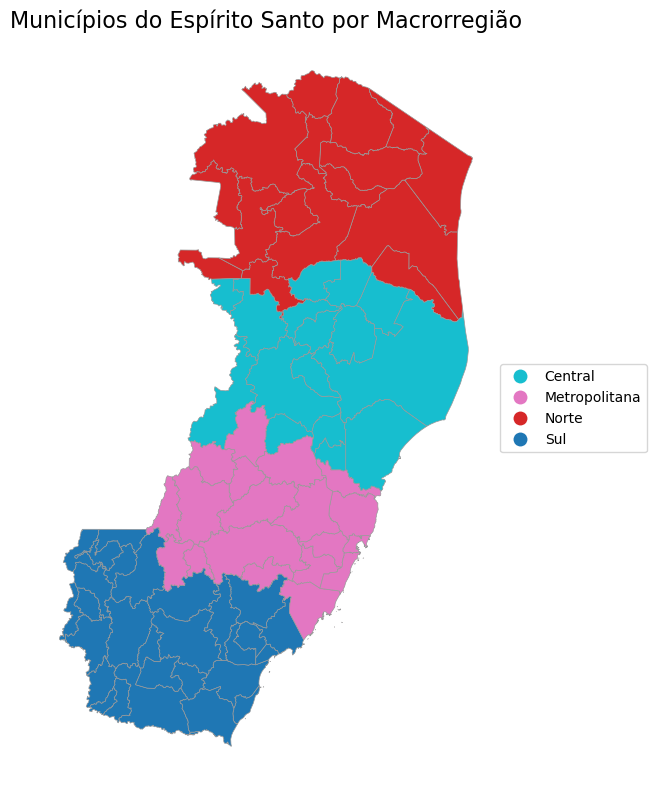

In [42]:
# Definir o tamanho base para o mapa
fig_size = (10, 8)

# Gerar o Mapa de Macrorregiões
fig, ax = plt.subplots(figsize=fig_size)
gdf_dados_ES.plot(
    column = 'NM_MACRORREGIAO',
    cmap = 'tab10_r',
    linewidth = 0.5,
    edgecolor = '0.6',
    legend = True,
    ax = ax,
    legend_kwds = {'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}
)

ax.set_title('Municípios do Espírito Santo por Macrorregião', fontsize=16)
ax.set_axis_off() # Remove os eixos (latitude/longitude)
plt.tight_layout()

# Exibindo o mapa
plt.show()

#### Mapa com Folium

In [43]:
# Mapear as macrorregiões
macrorregioes = gdf_dados_ES['NM_MACRORREGIAO'].unique()

# Usar a paleta Set3 (até 12 cores disponíveis)
cores = linear.Set3_09.scale(0, len(macrorregioes)).to_step(n=len(macrorregioes))

# Gerar uma cor para cada macrorregião
mapa_cores = {macrorregiao: cores.rgb_hex_str(i) for i, macrorregiao in enumerate(macrorregioes)}

In [44]:
# Função de Estilo base
def estilo_municipio(feature):
    macrorregiao = feature['properties']['NM_MACRORREGIAO']
    return {
              'fillColor': mapa_cores.get(macrorregiao, '#cccccc'),
              'color': 'black',
              'weight': 1,
              'fillOpacity': 0.6
            }

In [45]:
# Função de Estilo ao passar o mouse (leve escurecimento)
def destaque_municipio(feature):
    macrorregiao = feature['properties']['NM_MACRORREGIAO']
    return {
        'fillColor': mapa_cores.get(macrorregiao, '#999999'),
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.9
    }

In [46]:
# Criar o popup
popup = folium.GeoJsonPopup(
                              fields = ['NM_MUN', 'NM_MACRORREGIAO'],
                              aliases = ['Município:', 'Macrorregião:'],
                              localize = True,
                              labels = True,
                              style = "background-color: white; font-size: 13px;"
                            )

In [60]:
# Criar o mapa base centrado no ES
mapa_macros_ES = folium.Map(
                              location=[-19.5155, -39.3128],
                              zoom_start=8
                           )

In [61]:
# Adicionar camadas ao mapa
folium.GeoJson(
                  gdf_dados_ES,
                  name = 'Municípios',
                  style_function = estilo_municipio,
                  highlight_function = destaque_municipio,
                  popup = popup
              ).add_to(mapa_macros_ES)

In [62]:
# Construir manualmente os itens da legenda com base nas cores
lista_itens = ""
for regiao, cor in mapa_cores.items():
    lista_itens += f"""
                    <li>
                        <span style="background-color:{cor};width:15px;height:15px;display:inline-block;margin-right:5px;"></span>
                        {regiao}
                    </li>
                    """

In [63]:
# Inserir os itens no HTML do template da legenda
html_legenda = f"""
                <div style="
                    position: fixed;
                    bottom: 50px; left: 400px; width: 220px; height: auto;
                    background-color: white;
                    border: 2px solid grey;
                    z-index: 9999;
                    font-size: 14px;
                    padding: 10px;
                    box-shadow: 2px 2px 4px rgba(0,0,0,0.3);
                    ">
                    <b>Macrorregiões</b><br>
                    <ul style="list-style: none; padding: 0; margin: 0;">
                        {lista_itens}
                    </ul>
                </div>
                """

In [64]:
# Adiciona a legenda diretamente como um Element ao mapa
legenda = Element(html_legenda)
mapa_macros_ES.get_root().html.add_child(Element(html_legenda))

In [65]:
# Exibir o mapa
mapa_macros_ES

### **Microrregiões do ES**

#### Mapa com Matplotlib

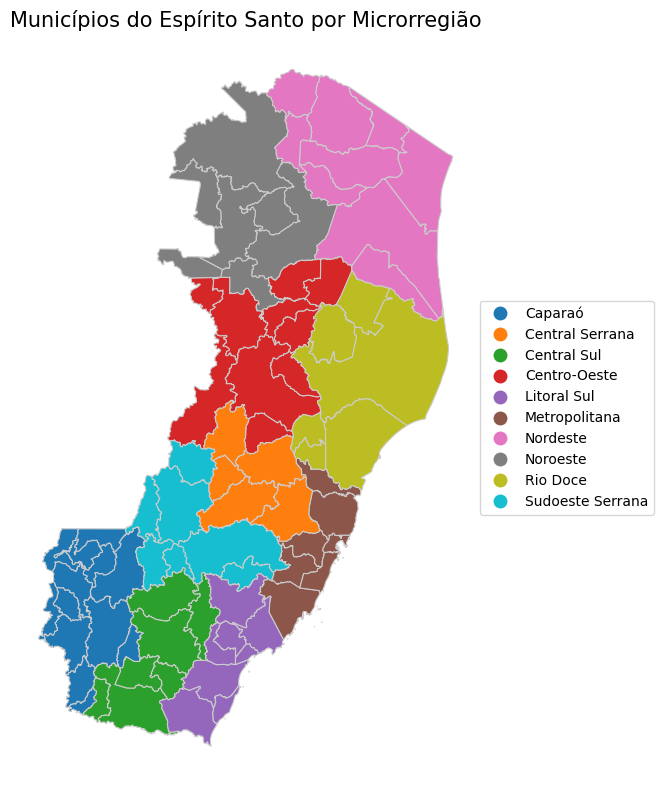

In [66]:
# Definir o tamanho base para o mapa
fig_size = (10, 8)

# Gerando o Mapa de Microrregiões
fig, ax = plt.subplots(figsize=fig_size)
gdf_dados_ES.plot(
                    column = 'NM_MICRORREGIAO',
                    cmap = 'tab10',
                    linewidth = 0.8,
                    edgecolor = '0.8',
                    legend = True,
                    ax = ax,
                    legend_kwds = {'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}
                  )
ax.set_title('Municípios do Espírito Santo por Microrregião', fontsize=15)
ax.set_axis_off()
plt.tight_layout()

# Exibindo o mapa
plt.show()

#### Mapa com Folium

In [67]:
# Mapear as microrregiões
microrregioes = gdf_dados_ES['NM_MICRORREGIAO'].unique()

# Usar a paleta Set3 (até 12 cores disponíveis)
cores_micro = linear.Set1_09.scale(0, len(microrregioes)).to_step(n=len(microrregioes))

# Gerar uma cor para cada macrorregião
mapa_cores_micro = {microrregiao: cores_micro.rgb_hex_str(i) for i, microrregiao in enumerate(microrregioes)}

In [68]:
# Função de Estilo base
def estilo_mun_micro(feature):
    microrregiao = feature['properties']['NM_MICRORREGIAO']
    return {
              'fillColor': mapa_cores_micro.get(microrregiao, '#cccccc'),
              'color': 'black',
              'weight': 1,
              'fillOpacity': 0.6
            }

In [69]:
# Função de Estilo ao passar o mouse (leve escurecimento)
def destaque_mun_micro(feature):
    microrregiao = feature['properties']['NM_MICRORREGIAO']
    return {
              'fillColor': mapa_cores_micro.get(microrregiao, '#999999'),
              'color': 'black',
              'weight': 2,
              'fillOpacity': 0.9
            }

In [70]:
# Criar o popup
popup_micro = folium.GeoJsonPopup(
                              fields = ['NM_MUN', 'NM_MICRORREGIAO'],
                              aliases = ['Município:', 'Microrregião:'],
                              localize = True,
                              labels = True,
                              style = "background-color: white; font-size: 13px;"
                            )

In [74]:
# Criar o mapa base centrado no ES
mapa_micros_ES = folium.Map(
                              location=[-19.5155, -39.3128],
                              zoom_start=8
                           )

In [75]:
# Adicionar camadas ao mapa
folium.GeoJson(
                  gdf_dados_ES,
                  name = 'Municípios',
                  style_function = estilo_mun_micro,
                  highlight_function = destaque_mun_micro,
                  popup = popup_micro
              ).add_to(mapa_micros_ES)

In [76]:
# Construir manualmente os itens da legenda com base nas cores
lista_itens_micro = ""
for regiao, cor in mapa_cores_micro.items():
    lista_itens_micro += f"""
                          <li>
                              <span style="background-color:{cor};width:15px;height:15px;display:inline-block;margin-right:5px;"></span>
                              {regiao}
                          </li>
                          """

In [77]:
# Inserir os itens no HTML do template da legenda
html_legenda_micro = f"""
                      <div style="
                          position: fixed;
                          bottom: 50px; left: 500px; width: 220px; height: auto;
                          background-color: white;
                          border: 2px solid grey;
                          z-index: 9999;
                          font-size: 14px;
                          padding: 10px;
                          box-shadow: 2px 2px 4px rgba(0,0,0,0.3);
                          ">
                          <b>Microrregiões</b><br>
                          <ul style="list-style: none; padding: 0; margin: 0;">
                              {lista_itens_micro}
                          </ul>
                      </div>
                      """

In [78]:
# Adiciona a legenda diretamente como um Element ao mapa
legenda_micro = Element(html_legenda_micro)
mapa_micros_ES.get_root().html.add_child(Element(html_legenda_micro))

In [79]:
# Exibir o mapa
mapa_micros_ES

### **Superintendências Regionais de Educação**

#### Mapa com Matplotlib

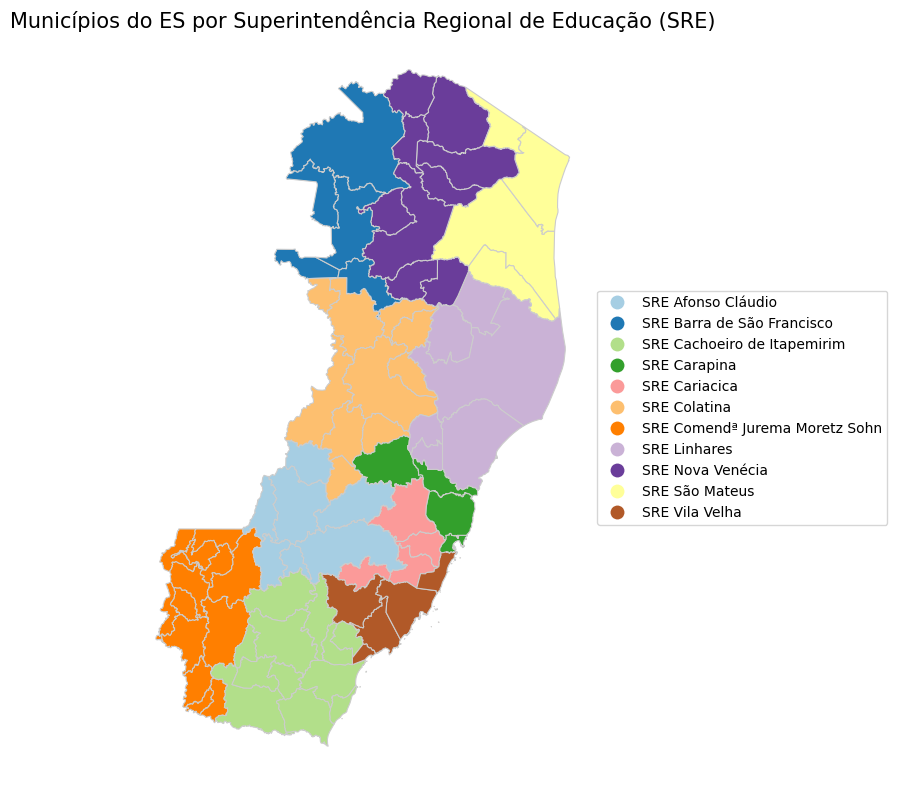

In [81]:
# Definir o tamanho base para o mapa
fig_size = (10, 8)

# Gerando o Mapa de SREs
fig, ax = plt.subplots(figsize=fig_size)
gdf_dados_ES.plot(
                    column='NM_SRE',
                    cmap = 'Paired',
                    linewidth = 0.8,
                    edgecolor = '0.8',
                    legend = True,
                    ax = ax,
                    legend_kwds = {'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}
                  )
ax.set_title('Municípios do ES por Superintendência Regional de Educação (SRE)', fontsize=15)
ax.set_axis_off()
plt.tight_layout()

# Exibindo o mapa
plt.show()

#### Mapa com Folium

In [82]:
# Mapear as SREs
regionais = gdf_dados_ES['NM_SRE'].unique()

# Definir a paleta de cores
cores_regionais = linear.Paired_11.scale(0, len(regionais)).to_step(n=len(regionais))

# Gerar uma cor para cada macrorregião
mapa_cores_sre = {regionais: cores_regionais.rgb_hex_str(i) for i, regionais in enumerate(regionais)}

In [83]:
# Função de Estilo base
def estilo_mun_sre(feature):
    regionais = feature['properties']['NM_SRE']
    return {
              'fillColor': mapa_cores_sre.get(regionais, '#cccccc'),
              'color': 'black',
              'weight': 1,
              'fillOpacity': 0.6
            }

In [84]:
# Função de Estilo ao passar o mouse (leve escurecimento)
def destaque_mun_sre(feature):
    regionais = feature['properties']['NM_SRE']
    return {
              'fillColor': mapa_cores_sre.get(regionais, '#999999'),
              'color': 'black',
              'weight': 2,
              'fillOpacity': 0.9
            }

In [85]:
# Criar o popup
popup_sre = folium.GeoJsonPopup(
                              fields = ['NM_MUN', 'NM_SRE'],
                              aliases = ['Município:', 'Superintendência:'],
                              localize = True,
                              labels = True,
                              style = "background-color: white; font-size: 13px;"
                            )

In [86]:
# Criar o mapa base centrado no ES
mapa_regionais_ES = folium.Map(
                                  location=[-19.5155, -39.3128],
                                  zoom_start=8
                              )

In [87]:
# Adicionar camadas ao mapa
folium.GeoJson(
                  gdf_dados_ES,
                  name = 'Municípios',
                  style_function = estilo_mun_sre,
                  highlight_function = destaque_mun_sre,
                  popup = popup_sre
              ).add_to(mapa_regionais_ES)

In [88]:
# Construir manualmente os itens da legenda com base nas cores
lista_itens_sre = ""
for regional, cor in mapa_cores_sre.items():
    lista_itens_sre += f"""
                        <li>
                            <span style="background-color:{cor};width:15px;height:15px;display:inline-block;margin-right:5px;"></span>
                            {regional}
                        </li>
                        """

In [89]:
# Inserir os itens no HTML do template da legenda
html_legenda_sre = f"""
                      <div style="
                          position: fixed;
                          bottom: 50px; left: 550px; width: 280px; height: auto;
                          background-color: white;
                          border: 2px solid grey;
                          z-index: 9999;
                          font-size: 14px;
                          padding: 10px;
                          box-shadow: 2px 2px 4px rgba(0,0,0,0.3);
                          ">
                          <b>Superintendências</b><br>
                          <ul style="list-style: none; padding: 0; margin: 0;">
                              {lista_itens_sre}
                          </ul>
                      </div>
                      """

In [90]:
# Adiciona a legenda diretamente como um Element ao mapa
legenda_sre = Element(html_legenda_sre)
mapa_regionais_ES.get_root().html.add_child(Element(html_legenda_sre))

In [91]:
# Exibir o mapa
mapa_regionais_ES